# Bayesian Decision

The dataset used is Optical Recognition of Handwritten Digits Dataset from the UCI repository. The original dataset consists of normalized bitmaps of handwritten digits (0-9). 32x32 bitmaps are divided into non-overlapping blocks of 4x4 and the number of ON pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0-16. This reduces dimensionality and gives invariance to small distortions.

The dataset used is a modified version of the above dataset, consisting of the data corresponding to the handwritten digits **5** and **6** extracted from the original dataset.

* Training data : `P1_data_train.csv` consisting of 777 instances (rows) of 64 attributes (cols) corresponding to the handwritten digit value (5 or 6) given in `P1_labels_train.csv`.
* Test data : `P1_data_test.csv` consisting of 333 instances (rows) of 64 attributes (cols) corresponding to the handwritten digit value (5 or 6) given in `P1_labels_test.csv`.

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

from matplotlib import pyplot as plt
import seaborn as sns

# Self-implemented APIs
from BayesClassifier import BayesClassifier
from discriminant_analysis import PCA
from discriminant_analysis import LDA

%matplotlib inline
sns.set()

In [2]:
# Reading csv files to pandas dataframe
df_X_train = pd.read_csv('P1_data/P1_data_train.csv', header=None)
df_y_train = pd.read_csv('P1_data/P1_labels_train.csv', header=None)
df_X_test = pd.read_csv('P1_data/P1_data_test.csv', header=None)
df_y_test = pd.read_csv('P1_data/P1_labels_test.csv', header=None)

In [3]:
# Converting dataframe into matrices
X_train = df_X_train.values 
y_train = df_y_train.values 
X_test = df_X_test.values   
y_test = df_y_test.values 

m, n = X_train.shape

# As a sanity check, printing out sizes of training and test inputs

print ('Number of training samples \t: %d')%(m)
print 'Number of test samples \t\t: %d'%(X_test.shape[0])
print 'Dimension of data \t\t: %d'%(n)

Number of training samples 	: 777
Number of test samples 		: 333
Dimension of data 		: 64


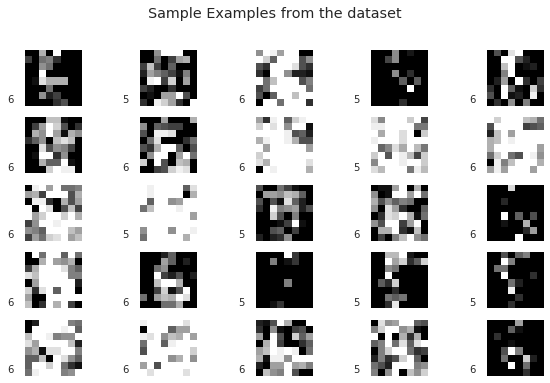

In [4]:
# Visualizing few examples from the training dataset
# The label (5 or 6) corresponding to each training example is shown in the left bottom corner of each image

fig = plt.figure(figsize=(10,6))
fig.suptitle('Sample Examples from the dataset')
for i in range(25):
    ax = fig.add_subplot(5,5,i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i,:].reshape(8,8), cmap='gray')
    ax.text(-3, 7, y_train[i,0].astype(int), fontsize=10)

`BayesClassifier.py` contains the `BayesClassifier` class which contains the following methods :
- `fit()` which estimates parameters like mean, covariance and apriori probability using **Maximum Likelihood Estimation**
- `predict()` which predicts the output of given test data using the estimated parameters
- `evaluate()` which calculates the accuracy and confusion matrix for the model

_Assumption : The data from each class can be modelled using multivariate normal distribution._

In [5]:
model = BayesClassifier()
# Estimating parameters
model.fit(X_train, y_train)


Fitting your data...
Successfully completed fitting!



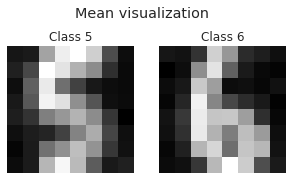

In [6]:
# Tensor containing means of each class

mean = model.mean

# Tensor containing covariance matrix of each class
covariance = model.covariance

# Array containing apriori probability of each class
apriori = model.apriori

# Visualizing estimated means of each class

fig = plt.figure(figsize=(5,3))
fig.suptitle('Mean visualization')
ax = fig.add_subplot(121, xticks=[], yticks=[])
ax.imshow(mean[0,:].reshape(8,8), cmap='gray')
ax.set_title('Class 5')
ax = fig.add_subplot(122, xticks=[], yticks=[])
ax.imshow(mean[1,:].reshape(8,8), cmap='gray')
ax.set_title('Class 6')
plt.show()

In [7]:
# Apriori probability
print 'Apriori probability of class 5: %f'%(apriori[0])
print 'Apriori probability of class 6: %f'%(apriori[1])

Apriori probability of class 5: 0.509653
Apriori probability of class 6: 0.490347


## Unequal covariance, $\Sigma_{5} \neq \Sigma_{6}$ 
Consider the general case of covariance matrix where off-diagonal elements are non-zero and the covariance matrix is of the form $\left(\begin{array}{cc} 
a & b\\
c & d
\end{array}\right)$

In [8]:
# Predict output using test set
y_pred_1 = model.predict(X_test)

# Evaluating the predicted output
acc_1, confusion_matrix_1 = model.evaluate(y_pred_1, y_test)


Predicting on your test data...
Prediction completed!

Evaluating your model...
Computing accuracy...


In [9]:
# Display different evaluation metrics
print 'Overall Accuracy: %.2f%%\n'%(acc_1*100)
print 'Confusion Matrix : '
print confusion_matrix_1

Overall Accuracy: 77.18%

Confusion Matrix : 
[[106  49]
 [ 27 151]]


#### Accuracy
| Class 	| Class 5 	|  Class 6	|  Overall	|
|---	|---	|---	|
|  **Accuracy**	|   68.39%	|   84.83%	|  77.18%	|

#### Confusion Matrix
| Class 	| Predicted 5 	|  Predicted 6	|
|---	|---	|---	|
|  **True 5**	| 106 	| 49 	|
|  **True 6**	| 27 	| 151 	|

## Equal covariance, $\Sigma_{5} = \Sigma_{6} = \Sigma = \left(\begin{array}{cc} 
a & b\\
c & d
\end{array}\right)$

In this case, consider a common covariance matrix for all classes. The common covariance matrix can be written as a sum of covariance matrix of each class weighted by the apriori probability of respective classes.

$\Sigma = \sum_{i} \hat{P}(C_i)\Sigma_{i}$

In [10]:
# Computing single covariance class
for i in range(model.n_class):
    covariance[i,:,:] *= apriori[i]
covariance = np.sum(covariance, axis=0)

# Setting covariance attribute of model
model.covariance = covariance

# Predicting output on test data using single covariance matrix
y_pred_2 = model.predict(X_test)

# Evaluating the predicted output
acc_2, confusion_matrix_2 = model.evaluate(y_pred_2, y_test)


Predicting on your test data...
Prediction completed!

Evaluating your model...
Computing accuracy...


In [11]:
# Display different evaluation metrics
print 'Overall Accuracy: %.2f%%\n'%(acc_2*100)
print 'Confusion matrix'
print confusion_matrix_2

Overall Accuracy: 85.59%

Confusion matrix
[[134  21]
 [ 27 151]]


#### Accuracy
| Class 	| Class 5 	|  Class 6	|  Overall	|
|---	|---	|---	|
|  **Accuracy**	|   86.45%	|   84.83%	|  85.59%	|


#### Confusion Matrix
| Class 	| Predicted 5 	|  Predicted 6	|
|---	|---	|---	|
|  **True 5**	| 134 	| 21 	|
|  **True 6**	| 27 	| 151 	|

## Diagonal covariance, $\Sigma_{5} = \Sigma_{6} = \Sigma = \left(\begin{array}{cc} 
a & 0\\
0 & b
\end{array}\right)$

In this case, we assume a common diagonal covariance matrix for all classes. The diagonal covariance matrix is derived by setting all off-diagonal elements as zero.

In [12]:
# Computing diagonal covariance matrix
cova = model.covariance
cov = np.zeros((n,n))
cov[np.arange(n), np.arange(n)] = cova[np.arange(n), np.arange(n)]

# Setting covariance attribute of model
model.covariance = cov

# Predicting output on test data
y_pred_3 = model.predict(X_test)

# Evaluating the predicted output
acc_3, confusion_matrix_3 = model.evaluate(y_pred_3, y_test)


Predicting on your test data...
Prediction completed!

Evaluating your model...
Computing accuracy...


In [13]:
print 'Overall Accuracy: %.2f%%\n'%(acc_3*100)
print 'Confusion matrix'
print confusion_matrix_3

Overall Accuracy: 81.08%

Confusion matrix
[[133  22]
 [ 41 137]]


#### Accuracy
| Class 	| Class 5 	|  Class 6	|  Overall	|
|---	|---	|---	|
|  **Accuracy**	|   85.8%	|   76.96%	|  81.08%	|


#### Confusion Matrix
| Class 	| Predicted 5 	|  Predicted 6	|
|---	|---	|---	|
|  **True 5**	| 133 	| 22 	|
|  **True 6**	| 41 	| 137 	|